# Load, standardize & split data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data
catsndogs = pd.read_csv("CATSnDOGS.csv").values
labels = pd.read_csv("Labels.csv").values.ravel()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(catsndogs)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

# Visualize important features heatmap and important features bars

In [ ]:
def visualize_important_features(coefficients, title):
    importance_magnitude = np.abs(coefficients)
    important_pixels = importance_magnitude.reshape(64, 64)

    plt.imshow(np.rot90(important_pixels, k=-1), cmap='hot')
    plt.colorbar()
    plt.title(title, fontsize=18)
    plt.show()

def plot_feature_importance(coefficients, title, top_n=None):
    importance_magnitude = np.abs(coefficients)
    sorted_indices = np.argsort(importance_magnitude)[::-1]  # Sort indices by magnitude, descending
    sorted_coefficients = importance_magnitude[sorted_indices]

    if top_n is not None:
        sorted_coefficients = sorted_coefficients[:top_n]
        sorted_indices = sorted_indices[:top_n]
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(sorted_coefficients)), sorted_coefficients, tick_label=sorted_indices)
        plt.title(title, fontsize=18)
        plt.xlabel('Feature Number', fontsize=15)
        plt.ylabel('Coefficient Magnitude', fontsize=15)
        plt.xticks(fontsize=15)
        plt.show()
    else:
        plt.figure(figsize=(10, 8))
        plt.bar(range(len(sorted_coefficients)), sorted_coefficients)
        plt.title(title, fontsize=18)
        plt.xlabel('Feature Index', fontsize=15)
        plt.ylabel('Coefficient Magnitude', fontsize=15)
        plt.xticks(fontsize=15)
        plt.show()


----------
# Lasso logisitc regression (L1)

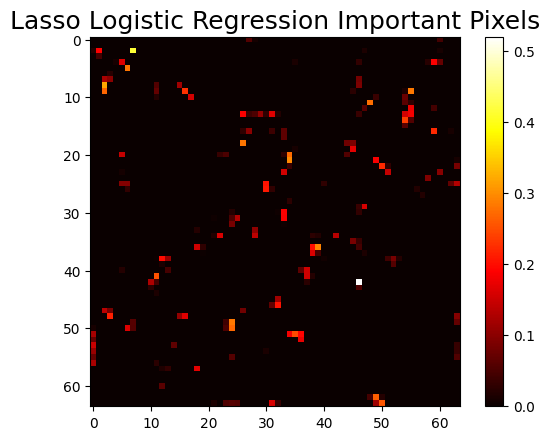

LASSO Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.90      0.83      0.86        23

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.86      0.85      0.85        40



In [ ]:
# Lasso Logistic Regression (L1)
lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso_model.fit(X_train, y_train)

# coefficients, heatmap
lasso_coefficients = lasso_model.coef_[0]
visualize_important_features(lasso_coefficients, "Lasso Logistic Regression Important Pixels")

# Classification report
lasso_predictions = lasso_model.predict(X_test)
print("LASSO Logistic Regression Classification Report")
print(classification_report(y_test, lasso_predictions))

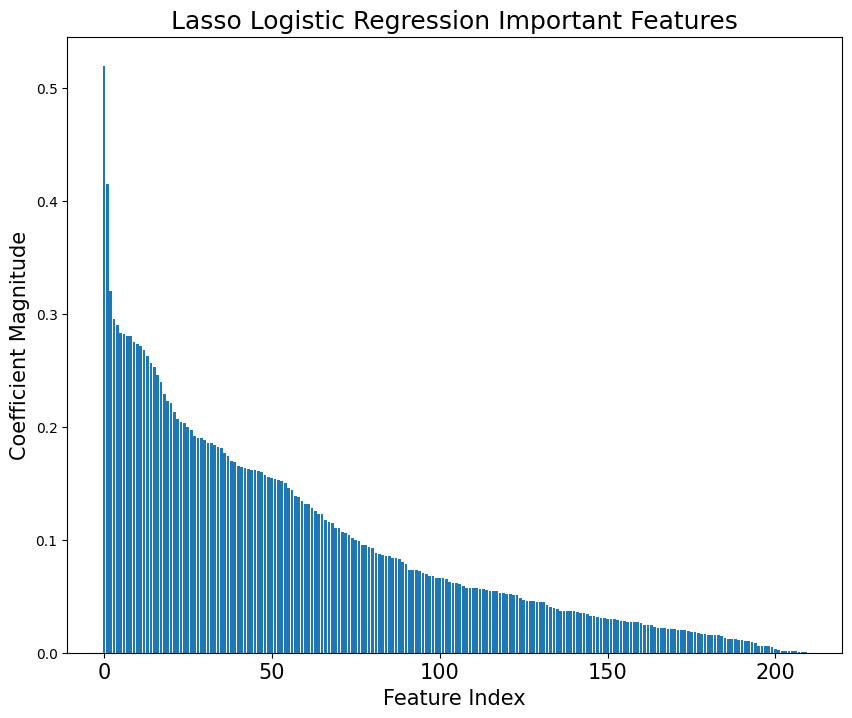

In [ ]:
# Plot full bars
non_zero_lasso_coefficients = lasso_coefficients[np.nonzero(lasso_coefficients)]
plot_feature_importance(non_zero_lasso_coefficients, "Lasso Logistic Regression Important Features")

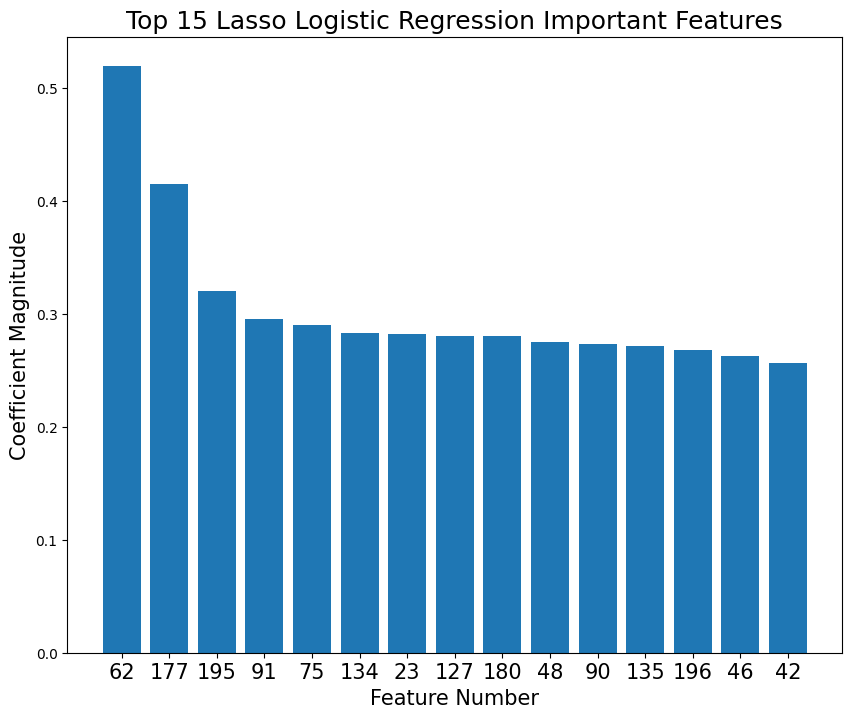

In [ ]:
# Plot top 15 features
plot_feature_importance(non_zero_lasso_coefficients, "Top 15 Lasso Logistic Regression Important Features", top_n=15)

------------
# Ridge logisitic regression (L2)

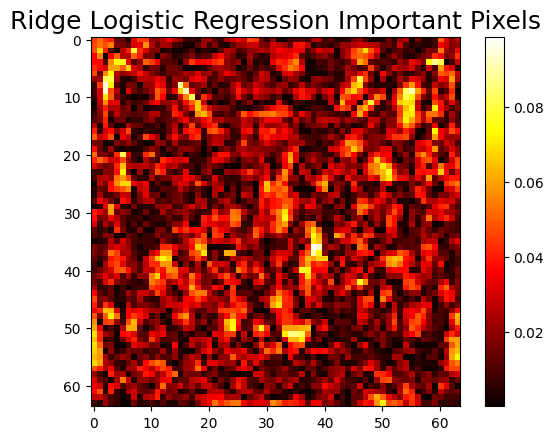

Ridge Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.79      0.83      0.81        23

    accuracy                           0.78        40
   macro avg       0.77      0.77      0.77        40
weighted avg       0.77      0.78      0.77        40



In [ ]:
# Ridge Logistic Regression (L2)
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
ridge_model.fit(X_train, y_train)

# coefficients, heatmap
ridge_coefficients = ridge_model.coef_[0]
visualize_important_features(ridge_coefficients, "Ridge Logistic Regression Important Pixels")

# Classification report
ridge_predictions = ridge_model.predict(X_test)
print("Ridge Logistic Regression Classification Report")
print(classification_report(y_test, ridge_predictions))

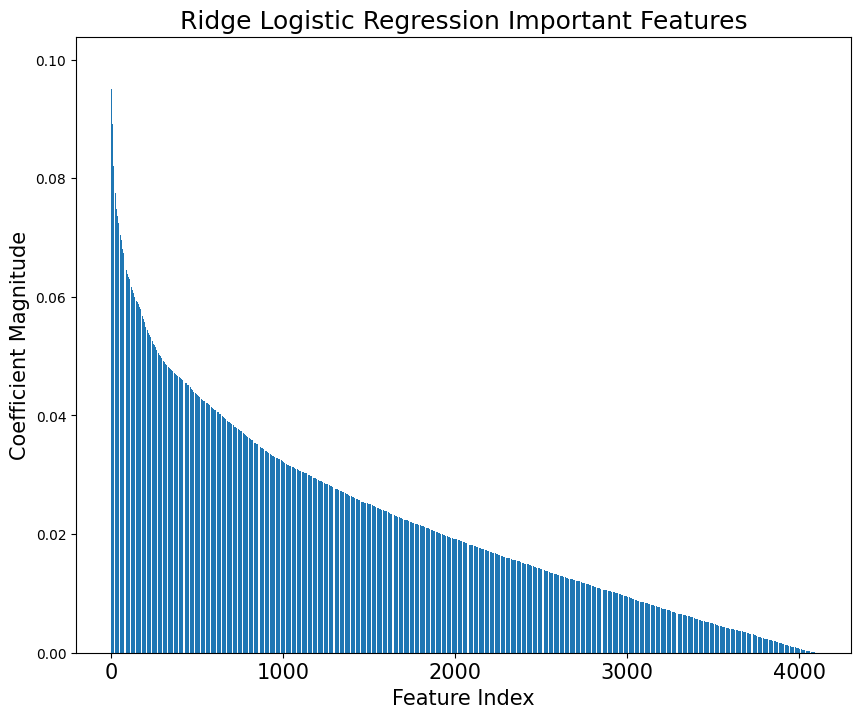

In [ ]:
# Plot full bars
plot_feature_importance(ridge_coefficients, "Ridge Logistic Regression Important Features")

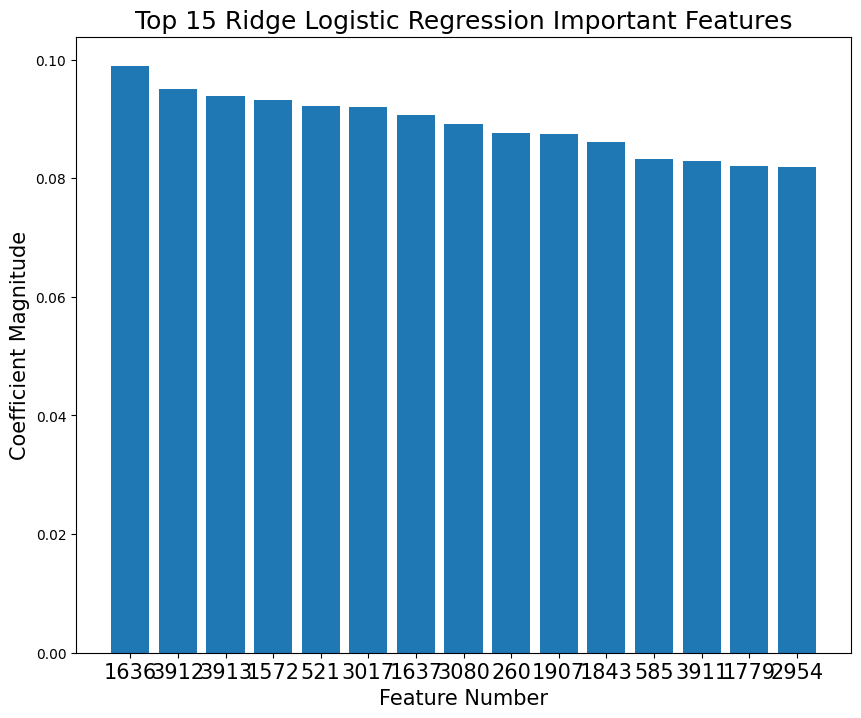

In [ ]:
# Plot top 15 features
plot_feature_importance(ridge_coefficients, "Top 15 Ridge Logistic Regression Important Features", top_n=15)

-----------
# Elasticnet logistic regression (L1/L2)

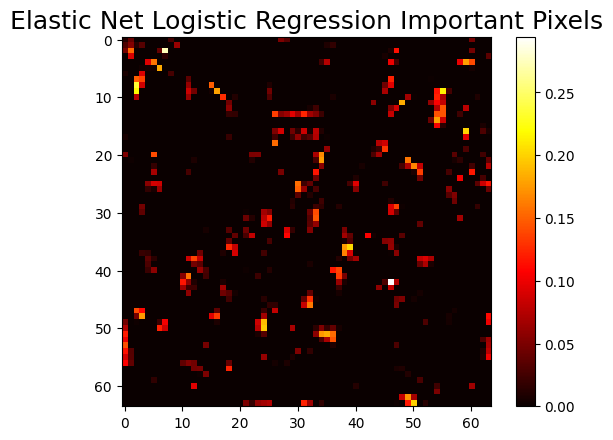

ElasticNet Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.90      0.78      0.84        23

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.84      0.82      0.83        40



In [ ]:
# ElasticNet Logistic Regression (L1 and L2)
elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elasticnet_model.fit(X_train, y_train)

# coefficients, heatmap
elasticnet_coefficients = elasticnet_model.coef_[0]
visualize_important_features(elasticnet_coefficients, "Elastic Net Logistic Regression Important Pixels")

# Classification report
elasticnet_predictions = elasticnet_model.predict(X_test)
print("ElasticNet Logistic Regression Classification Report")
print(classification_report(y_test, elasticnet_predictions))

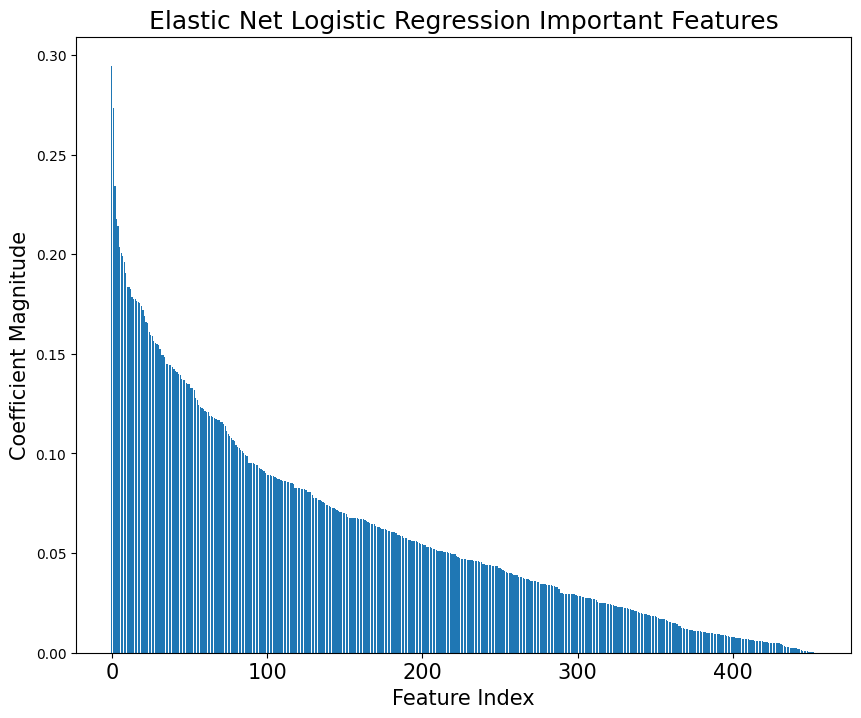

In [ ]:
# Plot full bars
non_zero_elasticnet_coefficients = elasticnet_coefficients[np.nonzero(elasticnet_coefficients)]
plot_feature_importance(non_zero_elasticnet_coefficients, "Elastic Net Logistic Regression Important Features")

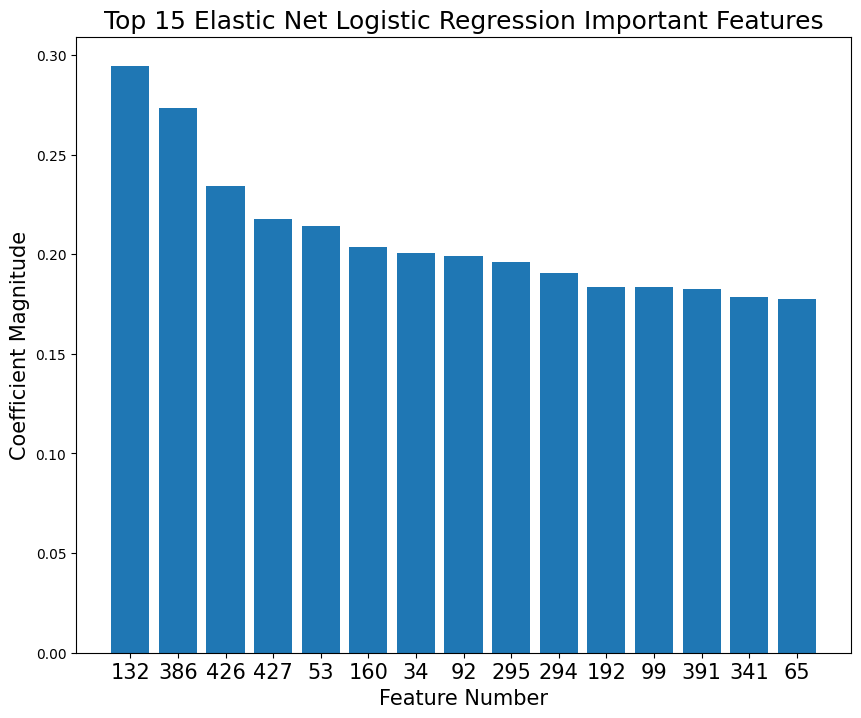

In [ ]:
# Plot top 15 features
plot_feature_importance(non_zero_elasticnet_coefficients, "Top 15 Elastic Net Logistic Regression Important Features", top_n=15)

# SVM with l2, ridge

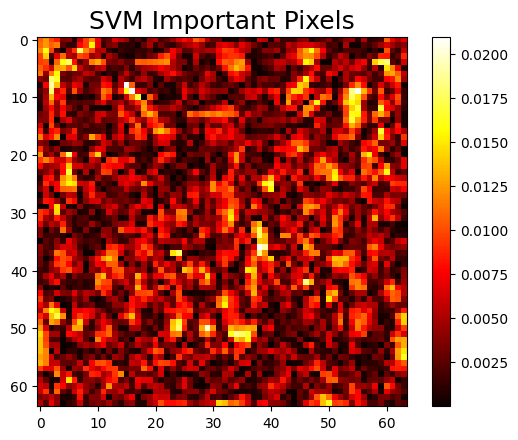

SVM Classification Report
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        17
           1       0.77      0.74      0.76        23

    accuracy                           0.73        40
   macro avg       0.72      0.72      0.72        40
weighted avg       0.73      0.72      0.73        40



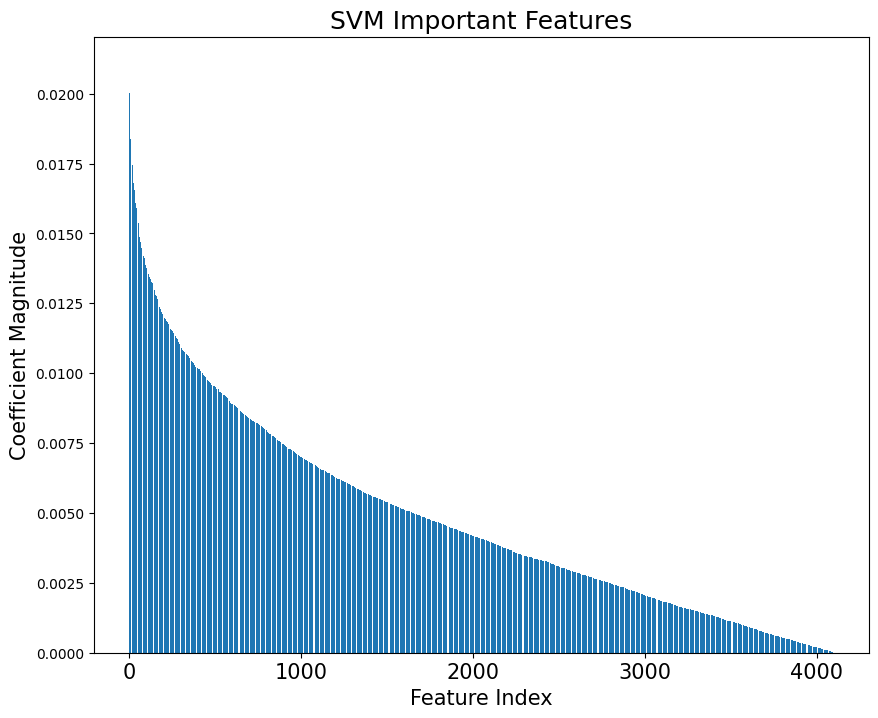

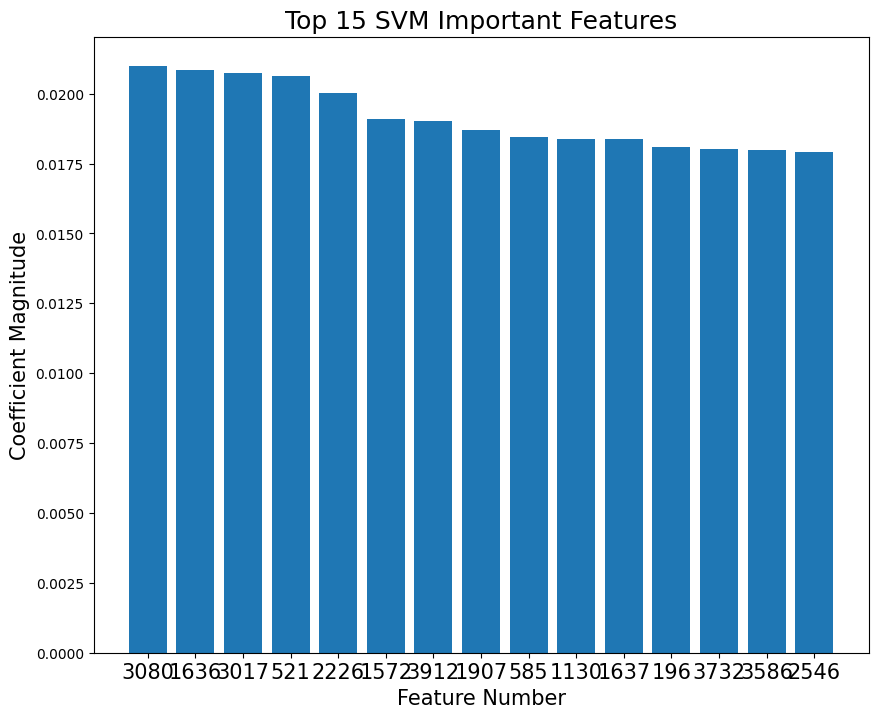

In [ ]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(penalty='l2', dual=False, max_iter=10000)
svm_model.fit(X_train, y_train)

svm_coefficients = svm_model.coef_[0]
visualize_important_features(svm_coefficients, "SVM Important Pixels")

svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report")
print(classification_report(y_test, svm_predictions))

non_zero_svm_coefficients = svm_coefficients[np.nonzero(svm_coefficients)]
plot_feature_importance(non_zero_svm_coefficients, "SVM Important Features")

plot_feature_importance(non_zero_svm_coefficients, "Top 15 SVM Important Features", top_n=15)
